# Kmeans Clustering -- NBA Teams
- Title Contender(4):   
- Playoff Team(12):  
- Good(5):  
- Below Average(5):  
- Worst(4):   

## Project Motivation  
Although the past decade had witnessed never seen before trades and insane franchise expansions, it has been regarded as one of the most lopsided times in basketball history because of how highly predictable the Finals' matchups were. An unstoppable dynasty from the west versus one of greatest to ever play basketball, Lebron James, from the east. Overtime teams went from having a couple superstars and several mediocre players to an equally balanced league where talent is found on any team. Whether it is an advancement in sports medicine, increased cap space, shift to brilliant recruiting, or improved management, the league as a whole is getting better. Not to mention, the overall style of play in todays era has changed remarkably. Younger players such as Luka Doncic and Jaysum Tatum are rising stars who will lift the association to new heights. With substantial moves happening every season, the purpose of this project is to indicate/define these teams into clusters based on their past performances.

## Data Source
The data was scraped from basketball-reference and nba.com/stats for every team from 2014 to 2019 were collected. 2014 was used as the initial start year just to view a crucial period (Lebron going back to the Cavs and the take over of Golden State). In total there are 30 teams and 48 features that include both averages and totals describing each team. 

In [1]:
# helpful packages to load
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
# learning plotly
import plotly.express as px
import plotly.graph_objs as go

In [2]:
df_2015 = pd.read_csv('data/totals_2015.csv') #2014-2015
df_2016 = pd.read_csv('data/totals_2016.csv') #2015-2016
df_2017 = pd.read_csv('data/totals_2017.csv') #2016-2017
df_2018 = pd.read_csv('data/totals_2018.csv') #2017-2018
df_2019 = pd.read_csv('data/totals_2019.csv') #2018-2019

In [3]:
df_2015['season'] = '2014-15'
df_2016['season'] = '2015-16'
df_2017['season'] = '2016-17'
df_2018['season'] = '2017-18'
df_2019['season'] = '2018-19'

In [4]:
df = df_2015.append(df_2016).append(df_2017).append(df_2018).append(df_2019)
df = df.drop(['Team2', 'G2'], axis = 1)

In [5]:
df['made_playoffs'] = df['Team'].str.contains('*', regex=False)
df['made_playoffs'] = df['made_playoffs'].astype(int)
df['Team'] = df['Team'].str.replace('*', '', regex=False)

In [6]:
df.Team

0     Golden State Warriors
1      Los Angeles Clippers
2          Dallas Mavericks
3           Toronto Raptors
4     Oklahoma City Thunder
              ...          
26            Chicago Bulls
27          New York Knicks
28      Cleveland Cavaliers
29        Memphis Grizzlies
30           League Average
Name: Team, Length: 155, dtype: object

In [7]:
df.shape

(155, 48)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155 entries, 0 to 30
Data columns (total 48 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Team           155 non-null    object 
 1   G              155 non-null    int64  
 2   MP-Total       155 non-null    int64  
 3   FGM-Total      155 non-null    int64  
 4   FGA-Total      155 non-null    int64  
 5   FG%-Total      155 non-null    float64
 6   3PM-Total      155 non-null    int64  
 7   3PA-Total      155 non-null    int64  
 8   3P%-Total      155 non-null    float64
 9   2PM-Total      155 non-null    int64  
 10  2PA-Total      155 non-null    int64  
 11  2P%-Total      155 non-null    float64
 12  FTM-Total      155 non-null    int64  
 13  FTA-Total      155 non-null    int64  
 14  FT%-Total      155 non-null    float64
 15  ORB-Total      155 non-null    int64  
 16  DRB-Total      155 non-null    int64  
 17  TRB-Total      155 non-null    int64  
 18  AST-Total  

In [19]:
df.describe()

,G,MP-Total,FGM-Total,FGA-Total,FG%-Total,3PM-Total,3PA-Total,3P%-Total,2PM-Total,2PA-Total,...,ORB-PG,DRB-PG,TRB-PG,AST-PG,STL-PG,BLK-PG,TOV-PG,PF-PG,PTS-PG,made_playoffs
count,155.0,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,...,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,82.0,19818.329032,3206.070968,7032.670968,0.455826,785.083871,2205.883871,0.355271,2420.980645,4826.793548,...,10.299355,33.550968,43.852903,22.950968,7.722581,4.847097,14.210968,20.226452,105.161935,0.516129
std,0.0,65.687188,157.415082,228.977572,0.014971,165.208878,436.644406,0.016446,161.779290,371.208411,...,1.090246,1.606697,1.889970,2.207583,0.823088,0.742697,1.142711,1.434504,5.429409,0.501360
min,82.0,19705.000000,2765.000000,6330.000000,0.408000,406.000000,1223.000000,0.317000,1895.000000,3436.000000,...,7.900000,29.300000,38.600000,18.000000,5.700000,2.400000,11.500000,16.600000,91.900000,0.000000
25%,82.0,19780.000000,3106.500000,6861.500000,0.447000,677.500000,1944.000000,0.345000,2316.500000,4578.500000,...,9.500000,32.400000,42.650000,21.400000,7.100000,4.300000,13.400000,19.200000,102.050000,0.000000
50%,82.0,19813.000000,3185.000000,7038.000000,0.454000,791.000000,2190.000000,0.354000,2437.000000,4824.000000,...,10.300000,33.600000,43.800000,22.700000,7.700000,4.800000,14.000000,20.300000,104.300000,1.000000
75%,82.0,19855.000000,3299.000000,7166.500000,0.466500,886.500000,2473.500000,0.366000,2532.000000,5096.000000,...,11.000000,34.500000,44.900000,24.200000,8.250000,5.300000,14.900000,21.200000,108.800000,1.000000
max,82.0,20005.000000,3612.000000,7706.000000,0.503000,1323.000000,3721.000000,0.416000,2739.000000,5597.000000,...,13.100000,40.400000,49.700000,30.400000,10.000000,7.500000,17.700000,24.800000,118.100000,1.000000


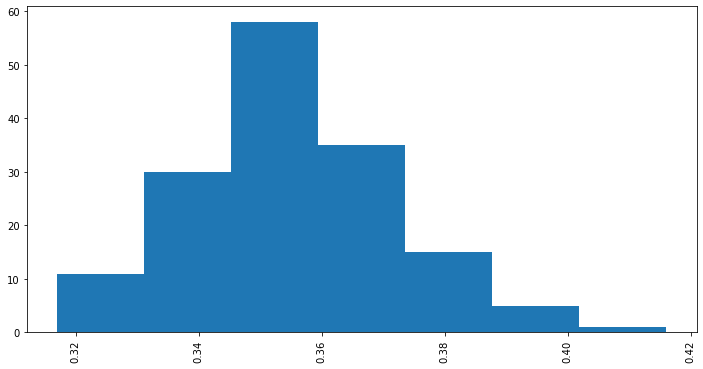

In [9]:
plt.figure(figsize=(12,6))

_ = plt.hist(df['3P%-Total'], bins=7)
_ = plt.xticks(rotation=90)
plt.show()

In [10]:
df.isnull().sum()/df.shape[0]

Team             0.0
G                0.0
MP-Total         0.0
FGM-Total        0.0
FGA-Total        0.0
FG%-Total        0.0
3PM-Total        0.0
3PA-Total        0.0
3P%-Total        0.0
2PM-Total        0.0
2PA-Total        0.0
2P%-Total        0.0
FTM-Total        0.0
FTA-Total        0.0
FT%-Total        0.0
ORB-Total        0.0
DRB-Total        0.0
TRB-Total        0.0
AST-Total        0.0
STL-Total        0.0
BLK-Total        0.0
TOV-Total        0.0
PF-Total         0.0
PTS-Total        0.0
MP-PG            0.0
FGM-PG           0.0
FGA-PG           0.0
FG%-PG           0.0
3PM-PG           0.0
3PA-PG           0.0
3P%-PG           0.0
2PM-PG           0.0
2PA-PG           0.0
2P%-PG           0.0
FTM-PG           0.0
FTA-PG           0.0
FT%-PG           0.0
ORB-PG           0.0
DRB-PG           0.0
TRB-PG           0.0
AST-PG           0.0
STL-PG           0.0
BLK-PG           0.0
TOV-PG           0.0
PF-PG            0.0
PTS-PG           0.0
season           0.0
made_playoffs

In [11]:
stat_cols = list(dict.fromkeys([i.split('-')[0] for i in df.columns]))
stat_cols

['Team',
 'G',
 'MP',
 'FGM',
 'FGA',
 'FG%',
 '3PM',
 '3PA',
 '3P%',
 '2PM',
 '2PA',
 '2P%',
 'FTM',
 'FTA',
 'FT%',
 'ORB',
 'DRB',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS',
 'season',
 'made_playoffs']

In [13]:
atlantic = ['Boston Celtics', 'Philadelphia 76ers', 'Brooklyn Nets', 
            'New York Knicks', 'Toronto Raptors']
central = ['Milwaukee Bucks', 'Indiana Pacers', 'Cleveland Cavaliers', 
          'Chicago Bulls', 'Detroit Pistons']
southeast = ['Atlanta Hawks', 'Orlando Magic', 'Charlotte Hornets', 
             'Miami Heat', 'Washington Wizards']
northwest = ['Utah Jazz', 'Portland Trail Blazers', 'Denver Nuggets', 
             'Oklahoma City Thunder', 'Minnesota Timberwolves']
pacific = ['Los Angeles Lakers', 'Los Angeles Clippers', 'Phoenix Suns', 
           'Golden State Warriors', 'Sacramento Kings']
southwest = ['San Antonio Spurs', 'Memphis Grizzlies','Dallas Mavericks', 
             'New Orleans Pelicans', 'Houston Rockets']

In [14]:
df.loc[df.Team.isin(atlantic), 'division'] = 'atlantic'
df.loc[df.Team.isin(central), 'division'] = 'central'
df.loc[df.Team.isin(southeast), 'division'] = 'southeast'
df.loc[df.Team.isin(northwest), 'division'] = 'northwest'
df.loc[df.Team.isin(pacific), 'division'] = 'pacific'
df.loc[df.Team.isin(southwest), 'division'] = 'southwest'

In [15]:
df.loc[df.Team.isin(atlantic), 'conference'] = 'east'
df.loc[df.Team.isin(central), 'conference'] = 'east'
df.loc[df.Team.isin(southeast), 'conference'] = 'east'
df.loc[df.Team.isin(northwest), 'conference'] = 'west'
df.loc[df.Team.isin(pacific), 'conference'] = 'west'
df.loc[df.Team.isin(southwest), 'conference'] = 'west'

In [16]:
df.conference.value_counts()

west    75
east    75
Name: conference, dtype: int64

In [17]:
df['division'].value_counts()

northwest    25
atlantic     25
southwest    25
southeast    25
pacific      25
central      25
Name: division, dtype: int64

In [18]:
fig = px.histogram(df, x='division', y='made_playoffs')
fig.show()

In [24]:
data = {}
for i in stat_cols:
    if i not in ['Team', 'G']:
        data[i] = df[[q for q in df.columns if q.startswith(i)]]

In [56]:
data['TOV']

,TOV-Total,TOV-PG
0,1185,14.5
1,1012,12.3
2,1062,13.0
3,1057,12.9
4,1205,14.7
...,...,...
26,1159,14.1
27,1151,14.0
28,1106,13.5
29,1147,14.0


In [64]:
Teams = {}
for i in df.Team.unique():
    Teams[i] = df[df.Team == i]

In [65]:
Teams.keys()

dict_keys(['Golden State Warriors', 'Los Angeles Clippers', 'Dallas Mavericks', 'Toronto Raptors', 'Oklahoma City Thunder', 'Houston Rockets', 'San Antonio Spurs', 'Cleveland Cavaliers', 'Portland Trail Blazers', 'Atlanta Hawks', 'Phoenix Suns', 'Denver Nuggets', 'Boston Celtics', 'Sacramento Kings', 'Chicago Bulls', 'New Orleans Pelicans', 'Washington Wizards', 'Detroit Pistons', 'Los Angeles Lakers', 'Memphis Grizzlies', 'Brooklyn Nets', 'Milwaukee Bucks', 'Minnesota Timberwolves', 'Indiana Pacers', 'Orlando Magic', 'Utah Jazz', 'Miami Heat', 'Charlotte Hornets', 'Philadelphia 76ers', 'New York Knicks', 'League Average'])

In [66]:
Teams['Los Angeles Lakers']

,Team,G,MP-Total,FGM-Total,FGA-Total,FG%-Total,3PM-Total,3PA-Total,3P%-Total,2PM-Total,...,AST-PG,STL-PG,BLK-PG,TOV-PG,PF-PG,PTS-PG,season,made_playoffs,division,conference
18,Los Angeles Lakers,82,19930,3054,7020,0.435,532,1546,0.344,2522,...,20.9,7.0,4.5,13.2,21.2,98.5,2014-15,0,pacific,west
29,Los Angeles Lakers,82,19730,2880,6956,0.414,639,2016,0.317,2241,...,18.0,7.2,4.1,13.7,20.3,97.3,2015-16,0,pacific,west
16,Los Angeles Lakers,82,19705,3224,7164,0.450,730,2110,0.346,2494,...,20.9,8.2,3.9,15.2,20.7,104.6,2016-17,0,pacific,west
10,Los Angeles Lakers,82,19905,3338,7248,0.461,822,2384,0.345,2516,...,23.8,7.7,4.7,15.8,21.2,108.1,2017-18,0,pacific,west
15,Los Angeles Lakers,82,19780,3491,7425,0.470,847,2541,0.333,2644,...,25.6,7.5,5.4,15.7,20.7,111.8,2018-19,0,pacific,west


In [61]:
div = df['AST-Total']

In [62]:
fta

,FTA-Total,FTA-PG
0,1709,20.8
1,2067,25.2
2,1843,22.5
3,2014,24.6
4,2020,24.6
...,...,...
26,1695,20.7
27,1956,23.9
28,1694,20.7
29,1882,23.0


In [14]:
by_season = df.groupby(['Team', 'season'])

In [15]:
by_season.head()

,Team,G,MP-Total,FGM-Total,FGA-Total,FG%-Total,3PM-Total,3PA-Total,3P%-Total,2PM-Total,...,DRB-PG,TRB-PG,AST-PG,STL-PG,BLK-PG,TOV-PG,PF-PG,PTS-PG,season,made_playoffs
0,Golden State Warriors,82,19730,3410,7137,0.478,883,2217,0.398,2527,...,34.3,44.7,27.4,9.3,6.0,14.5,19.9,110.0,2014-15,1
1,Los Angeles Clippers,82,19730,3228,6830,0.473,827,2202,0.376,2401,...,33.1,42.6,24.8,7.8,5.0,12.3,21.3,106.7,2014-15,1
2,Dallas Mavericks,82,19880,3255,7036,0.463,732,2082,0.352,2523,...,31.8,42.3,22.5,8.1,4.5,13.0,20.0,105.2,2014-15,1
3,Toronto Raptors,82,19855,3108,6829,0.455,726,2060,0.352,2382,...,30.8,41.5,20.7,7.5,4.4,12.9,20.9,104.0,2014-15,1
4,Oklahoma City Thunder,82,19830,3184,7119,0.447,632,1864,0.339,2552,...,34.7,47.5,20.5,7.3,5.5,14.7,22.3,104.0,2014-15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,Chicago Bulls,82,19905,3266,7205,0.453,745,2123,0.351,2521,...,34.1,42.9,21.9,7.4,4.3,14.1,20.3,104.9,2018-19,0
27,New York Knicks,82,19780,3134,7241,0.433,823,2421,0.340,2311,...,34.3,44.7,20.1,6.8,5.1,14.0,20.9,104.6,2018-19,0
28,Cleveland Cavaliers,82,19755,3189,7184,0.444,847,2388,0.355,2342,...,31.9,42.7,20.7,6.5,2.4,13.5,20.0,104.5,2018-19,0
29,Memphis Grizzlies,82,19880,3113,6924,0.450,811,2368,0.342,2302,...,33.0,41.8,23.9,8.3,5.5,14.0,22.0,103.5,2018-19,0


In [16]:
headers = ['Team', 'Match-Up', 'Game-Date', 'Season', 'W/L', 'Min', 'PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%'
          'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'PF', '+/-']

In [17]:
boxscores_2014 = pd.read_csv('data/totals_2014-15.csv', names=headers, skiprows=1, index_col=False)
boxscores_2014.head(10)

,Team,Match-Up,Game-Date,Season,W/L,Min,PTS,FGM,FGA,FG%,...,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,+/-
0,\nBKN\n,\nBKN vs. MIL\n,\n03/20/2015\n,NaN,W,63,129,46,107,43.0,...,34,76.5,16,37,53,31,15,9,7,25
1,\nMIL\n,\nMIL @ BKN\n,\n03/20/2015\n,NaN,L,63,127,49,129,38.0,...,29,72.4,38,43,81,23,18,11,9,31
2,\nSAS\n,\nSAS vs. POR\n,\n12/19/2014\n,NaN,L,63,119,45,109,41.3,...,26,80.8,17,43,60,24,20,8,4,22
3,\nPOR\n,\nPOR @ SAS\n,\n12/19/2014\n,NaN,W,63,129,47,110,42.7,...,23,95.7,15,43,58,18,14,12,5,24
4,\nMEM\n,\nMEM @ SAS\n,\n12/17/2014\n,NaN,W,63,117,48,107,44.9,...,14,78.6,13,45,58,29,12,12,6,27
5,\nSAS\n,\nSAS vs. MEM\n,\n12/17/2014\n,NaN,L,63,116,43,105,41.0,...,27,48.1,19,41,60,31,16,6,11,16
6,\nBKN\n,\nBKN vs. MIL\n,\n11/19/2014\n,NaN,L,63,118,44,92,47.8,...,29,72.4,10,39,49,26,22,7,6,25
7,\nMIL\n,\nMIL @ BKN\n,\n11/19/2014\n,NaN,W,63,122,48,108,44.4,...,28,75.0,16,35,51,23,15,12,4,28
8,\nIND\n,\nIND vs. WAS\n,\n04/14/2015\n,NaN,W,58,99,40,105,38.1,...,17,58.8,14,42,56,22,15,5,9,17
9,\nWAS\n,\nWAS @ IND\n,\n04/14/2015\n,NaN,L,58,95,37,104,35.6,...,17,82.4,13,46,59,22,13,8,2,22


In [18]:
boxscores_2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Team       2460 non-null   object 
 1   Match-Up   2460 non-null   object 
 2   Game-Date  2460 non-null   object 
 3   Season     0 non-null      float64
 4   W/L        2460 non-null   object 
 5   Min        2460 non-null   int64  
 6   PTS        2460 non-null   int64  
 7   FGM        2460 non-null   int64  
 8   FGA        2460 non-null   int64  
 9   FG%        2460 non-null   float64
 10  3PM        2460 non-null   int64  
 11  3PA        2460 non-null   int64  
 12  3P%FTM     2460 non-null   float64
 13  FTA        2460 non-null   int64  
 14  FT%        2460 non-null   int64  
 15  OREB       2460 non-null   float64
 16  DREB       2460 non-null   int64  
 17  REB        2460 non-null   int64  
 18  AST        2460 non-null   int64  
 19  TOV        2460 non-null   int64  
 20  STL     

In [19]:
boxscores_2014 = boxscores_2014.replace('\n','', regex=True)

In [20]:
boxscores_2014.head()

,Team,Match-Up,Game-Date,Season,W/L,Min,PTS,FGM,FGA,FG%,...,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,+/-
0,BKN,BKN vs. MIL,03/20/2015,NaN,W,63,129,46,107,43.0,...,34,76.5,16,37,53,31,15,9,7,25
1,MIL,MIL @ BKN,03/20/2015,NaN,L,63,127,49,129,38.0,...,29,72.4,38,43,81,23,18,11,9,31
2,SAS,SAS vs. POR,12/19/2014,NaN,L,63,119,45,109,41.3,...,26,80.8,17,43,60,24,20,8,4,22
3,POR,POR @ SAS,12/19/2014,NaN,W,63,129,47,110,42.7,...,23,95.7,15,43,58,18,14,12,5,24
4,MEM,MEM @ SAS,12/17/2014,NaN,W,63,117,48,107,44.9,...,14,78.6,13,45,58,29,12,12,6,27


In [21]:
boxscores_2014.shape

(2460, 24)

In [22]:
boxscores_2014.Team.value_counts()

DEN    82
SAC    82
BKN    82
PHI    82
DET    82
WAS    82
GSW    82
HOU    82
MIL    82
ATL    82
PHX    82
UTA    82
MIN    82
NOP    82
DAL    82
LAL    82
SAS    82
NYK    82
CHA    82
ORL    82
MEM    82
CLE    82
POR    82
CHI    82
MIA    82
BOS    82
TOR    82
IND    82
LAC    82
OKC    82
Name: Team, dtype: int64